<a href="https://www.kaggle.com/code/josephmagrina/assignment-2?scriptVersionId=102283267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cap-4611-2021-fall-assignment-02/sample_submission.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/eval.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/train.csv


In [2]:
train_df = pd.read_csv("../input/cap-4611-2021-fall-assignment-02/train.csv", low_memory = False)
train_df.head()

,id,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,474,Road to Ballhalla,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,475,RollerCoaster Legends II: Thor's Hammer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,476,Island Time,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
3,477,Bridge Constructor Portal,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
4,478,Secret of Mana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET


In [3]:
test_df = pd.read_csv("../input/cap-4611-2021-fall-assignment-02/eval.csv")
test_df.head()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1421 non-null   int64 
 1   title                     1421 non-null   object
 2   console                   1421 non-null   int64 
 3   alcohol_reference         1421 non-null   int64 
 4   animated_blood            1421 non-null   int64 
 5   blood                     1421 non-null   int64 
 6   blood_and_gore            1421 non-null   int64 
 7   cartoon_violence          1421 non-null   int64 
 8   crude_humor               1421 non-null   int64 
 9   drug_reference            1421 non-null   int64 
 10  fantasy_violence          1421 non-null   int64 
 11  intense_violence          1421 non-null   int64 
 12  language                  1421 non-null   int64 
 13  lyrics                    1421 non-null   int64 
 14  mature_humor            

In [5]:
#Missing "title & ESRB rating"
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        474 non-null    int64
 1   console                   474 non-null    int64
 2   alcohol_reference         474 non-null    int64
 3   animated_blood            474 non-null    int64
 4   blood                     474 non-null    int64
 5   blood_and_gore            474 non-null    int64
 6   cartoon_violence          474 non-null    int64
 7   crude_humor               474 non-null    int64
 8   drug_reference            474 non-null    int64
 9   fantasy_violence          474 non-null    int64
 10  intense_violence          474 non-null    int64
 11  language                  474 non-null    int64
 12  lyrics                    474 non-null    int64
 13  mature_humor              474 non-null    int64
 14  mild_blood                474 non-null    

In [6]:
train_df.describe()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.00000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1184.000000,0.472203,0.048557,0.009852,0.219564,0.132301,0.019001,0.056298,0.034483,0.235749,...,0.014075,0.028149,0.055595,0.065447,0.116819,0.04152,0.111189,0.016890,0.016186,0.061928
std,410.351678,0.499402,0.215016,0.098803,0.414097,0.338937,0.136575,0.230578,0.182530,0.424616,...,0.117840,0.165457,0.229218,0.247400,0.321318,0.19956,0.314477,0.128903,0.126234,0.241110
min,474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1539.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_df.describe()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,236.500000,0.485232,0.054852,0.010549,0.253165,0.107595,0.021097,0.048523,0.035865,0.175105,...,0.010549,0.052743,0.063291,0.071730,0.122363,0.018987,0.137131,0.012658,0.014768,0.069620
std,136.976275,0.500310,0.227932,0.102271,0.435284,0.310196,0.143860,0.215096,0.186150,0.380459,...,0.102271,0.223755,0.243743,0.258313,0.328051,0.136624,0.344349,0.111913,0.120750,0.254775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,236.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,354.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,473.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train_df.nunique()

id                          1421
title                       1421
console                        2
alcohol_reference              2
animated_blood                 2
blood                          2
blood_and_gore                 2
cartoon_violence               2
crude_humor                    2
drug_reference                 2
fantasy_violence               2
intense_violence               2
language                       2
lyrics                         2
mature_humor                   2
mild_blood                     2
mild_cartoon_violence          2
mild_fantasy_violence          2
mild_language                  2
mild_lyrics                    2
mild_suggestive_themes         2
mild_violence                  2
no_descriptors                 2
nudity                         2
partial_nudity                 2
sexual_content                 2
sexual_themes                  2
simulated_gambling             2
strong_janguage                2
strong_sexual_content          2
suggestive

In [9]:
test_df.nunique()

id                          474
console                       2
alcohol_reference             2
animated_blood                2
blood                         2
blood_and_gore                2
cartoon_violence              2
crude_humor                   2
drug_reference                2
fantasy_violence              2
intense_violence              2
language                      2
lyrics                        2
mature_humor                  2
mild_blood                    2
mild_cartoon_violence         2
mild_fantasy_violence         2
mild_language                 2
mild_lyrics                   2
mild_suggestive_themes        2
mild_violence                 2
no_descriptors                2
nudity                        2
partial_nudity                2
sexual_content                2
sexual_themes                 2
simulated_gambling            2
strong_janguage               2
strong_sexual_content         2
suggestive_themes             2
use_of_alcohol                2
use_of_d

# 2. Exploratory Data Analysis

In [10]:
#Check missing values in train data
train_df.isnull().sum()

id                          0
title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence  

In [11]:
#Check missing values in test data
test_df.isnull().sum()

id                          0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
dtype: int

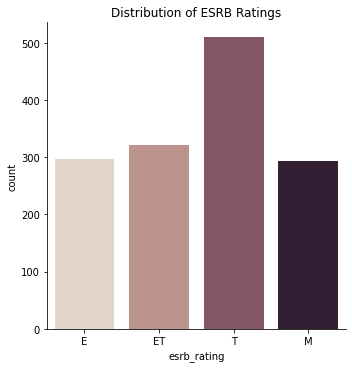

In [12]:
#Distribution of esrb ratings in training data
sns.catplot(x = "esrb_rating", kind = "count", palette = "ch:.25", data = train_df).set(title = 'Distribution of ESRB Ratings')

0    1109
1     312
Name: blood, dtype: int64


[Text(0.5, 1.0, 'Occurence of Blood')]

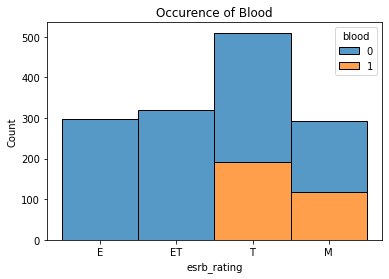

In [13]:
print(train_df['blood'].value_counts())
sns.histplot(data = train_df, x = "esrb_rating", hue = "blood", multiple = "stack").set(title = 'Occurence of Blood')

0    1233
1     188
Name: blood_and_gore, dtype: int64


[Text(0.5, 1.0, 'Occurence of Blood and Gore')]

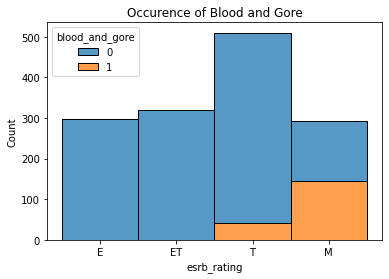

In [14]:
print(train_df['blood_and_gore'].value_counts())
sns.histplot(data = train_df, x = "esrb_rating", hue = "blood_and_gore", multiple = "stack").set(title = 'Occurence of Blood and Gore')

0    1394
1      27
Name: cartoon_violence, dtype: int64


[Text(0.5, 1.0, 'Occurence of Cartoon Violence')]

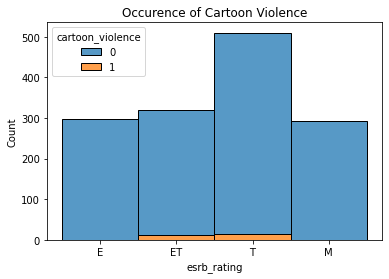

In [15]:
print(train_df['cartoon_violence'].value_counts())
sns.histplot(data = train_df, x = "esrb_rating", hue = "cartoon_violence", multiple = "stack").set(title = 'Occurence of Cartoon Violence')

0    1333
1      88
Name: violence, dtype: int64


[Text(0.5, 1.0, 'Occurence of Violence')]

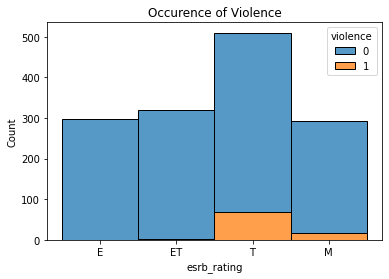

In [16]:
print(train_df['violence'].value_counts())
sns.histplot(data = train_df, x = "esrb_rating", hue = "violence", multiple = "stack").set(title = 'Occurence of Violence')

In [17]:
#Function to convert from string to integer for esrb rating
def convert_int(train_col):
    series = pd.Series(train_col)
    
    dict = {
        "E" : 0,
        "ET" : 1,
        "T" : 2,
        "M" : 3
    }
    
    return series.map(dict)

In [18]:
#Function to convert from integer to string for esrb rating
def convert_string(train_col):
    series = pd.Series(train_col)
    
    dict = {
        0 : "E",
        1 : "ET",
        2 : "T",
        3 : "M"
    }
    
    return series.map(dict)

# 3. Models

In [19]:
#Converting the esrb rating columns to intgers
train_df.esrb_rating = convert_int(train_df.esrb_rating)

In [20]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

y = train_df['esrb_rating']  # Labels
X = train_df.drop(['esrb_rating', 'title', 'id'], axis = 1)

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False, random_state = 42)

## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

#Create Logistic Regression Model
lr = LogisticRegression()

#Train the Logistic Regression Model
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8258426966292135


In [23]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, X_train, y_train, cv = 10)
print('Cross-Validation Accuracy Scores', scores_lr)

Cross-Validation Accuracy Scores [0.85981308 0.89719626 0.74766355 0.8317757  0.86915888 0.80188679
 0.87735849 0.82075472 0.81132075 0.89622642]


In [24]:
#Summary Statistics
scores_lr = pd.Series(scores_lr)
selected_lr = scores_lr.mean()
print(scores_lr.min(), scores_lr.mean(), scores_lr.max())
print("=============================================================")
scores_lr.describe()

0.7476635514018691 0.8413154646446834 0.897196261682243


count    10.000000
mean      0.841315
std       0.047485
min       0.747664
25%       0.813679
50%       0.845794
75%       0.875309
max       0.897196
dtype: float64

## Support Vector Machine Model

In [25]:
from sklearn import svm

#Create Support Vector Machine
support_vec = svm.SVC(kernel='linear')

#Train Support Vector Machine
support_vec = support_vec.fit(X_train, y_train)

y_pred_support_vec = support_vec.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_support_vec))

Accuracy: 0.8567415730337079


In [27]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores_support_vec = cross_val_score(support_vec, X_train, y_train, cv = 10)
print('Cross-Validation Accuracy Scores', scores_support_vec)

Cross-Validation Accuracy Scores [0.85981308 0.87850467 0.77570093 0.8317757  0.85046729 0.81132075
 0.87735849 0.83018868 0.83018868 0.86792453]


In [28]:
#Summary Statistics
scores_support_vec = pd.Series(scores_support_vec)
selected_support_vec = scores_support_vec.mean()
print(scores_support_vec.min(), scores_support_vec.mean(), scores_support_vec.max())
print("=============================================================")
scores_support_vec.describe()

0.7757009345794392 0.8413242814318462 0.8785046728971962


count    10.000000
mean      0.841324
std       0.032248
min       0.775701
25%       0.830189
50%       0.841121
75%       0.865897
max       0.878505
dtype: float64

## Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree Classifer
dtc = DecisionTreeClassifier()

#Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.8426966292134831


In [31]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores_dtc = cross_val_score(dtc, X_train, y_train, cv = 10)
print('Cross-Validation Accuracy Scores', scores_dtc)

Cross-Validation Accuracy Scores [0.82242991 0.85981308 0.76635514 0.8411215  0.8411215  0.82075472
 0.83962264 0.83962264 0.81132075 0.87735849]


In [32]:
#Summary Statistics
scores_dtc = pd.Series(scores_dtc)
selected_dtc = scores_dtc.mean()
print(scores_dtc.min(), scores_dtc.mean(), scores_dtc.max())
print("=============================================================")
scores_dtc.describe()

0.7663551401869159 0.8319520366778347 0.8773584905660378


count    10.000000
mean      0.831952
std       0.029942
min       0.766355
25%       0.821174
50%       0.839623
75%       0.841121
max       0.877358
dtype: float64

## RandomForestClassifier Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train Random Forest Classifier
rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rfc = rfc.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.8539325842696629


In [35]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores_rfc = cross_val_score(rfc, X_train, y_train, cv = 10)
print('Cross-Validation Accuracy Scores', scores_rfc)

Cross-Validation Accuracy Scores [0.87850467 0.91588785 0.79439252 0.85981308 0.86915888 0.80188679
 0.87735849 0.86792453 0.83018868 0.89622642]


In [36]:
#Summary Statistics
scores_rfc = pd.Series(scores_rfc)
selected_rfc = scores_rfc.mean()
print(scores_rfc.min(), scores_rfc.mean(), scores_rfc.max())
print("=============================================================")
scores_rfc.describe()

0.794392523364486 0.8591341915006172 0.9158878504672897


count    10.000000
mean      0.859134
std       0.039142
min       0.794393
25%       0.837595
50%       0.868542
75%       0.878218
max       0.915888
dtype: float64

## K Nearest Neighbors Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#Create K Neighbors Classifier
nbrs = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')

#Train K Neighbors Classifier
nbrs.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_nbrs = nbrs.predict(X_test)

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.8539325842696629


In [39]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores_nbrs = cross_val_score(nbrs, X_train, y_train, cv = 10)
print('Cross-Validation Accuracy Scores', scores_nbrs)

Cross-Validation Accuracy Scores [0.77570093 0.87850467 0.71962617 0.76635514 0.77570093 0.69811321
 0.77358491 0.80188679 0.80188679 0.83962264]


In [40]:
#Summary Statistics
scores_nbrs = pd.Series(scores_nbrs)
selected_nbrs = scores_nbrs.mean()
print(scores_nbrs.min(), scores_nbrs.mean(), scores_nbrs.max())
print("=============================================================")
scores_nbrs.describe()

0.6981132075471698 0.7830982190089931 0.8785046728971962


count    10.000000
mean      0.783098
std       0.052424
min       0.698113
25%       0.768163
50%       0.775701
75%       0.801887
max       0.878505
dtype: float64

# 4. Model Selection

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest Classifier', 'K Nearest Neighbor'],
    'Score': [selected_lr, selected_support_vec, selected_dtc, selected_rfc, selected_nbrs]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest Classifier,0.859134
1,Support Vector Machine,0.841324
0,Logistic Regression,0.841315
2,Decision Tree,0.831952
4,K Nearest Neighbor,0.783098


In [42]:
#Creating a new test variable with ID dropped
test_modified = test_df.drop(['id'], axis = 1)

#Using the new variable in the predictions on selected model
predictions = rfc.predict(test_modified)

#Modifying predictions esrb rating from integer to string
predictions = convert_string(predictions)
output = pd.DataFrame({'id': test_df.id, 'esrb_rating': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
